# **Introduction to COVID-19**
![alt text](https://www.google.com/search?q=coronavirus+images&tbm=isch&ved=2ahUKEwjmhuGArt3pAhVXFCsKHa6DBOoQ2-cCegQIABAA&oq=coronavirus+IM&gs_lcp=CgNpbWcQARgAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADoECCMQJzoECAAQQ1DcuQJYndgCYPXnAmgAcAB4AIABzQGIAcgEkgEFMC4xLjKYAQCgAQGqAQtnd3Mtd2l6LWltZw&sclient=img&ei=Qz_TXqbZMNeorAGuh5LQDg#imgrc=ZCYkoyFLKXBJvM)
Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced.
SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 15 May 2020), this leads to a total of 300K+ Deaths across the globe, including 159K+ deaths alone in Europe.
Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time. In this notebook, the main focus is to analyze the spread trend of this virus all over the world.

On March 24, Prime Minister Narendra Modi annouced that the country would go under 21-day lackdown to combat the spread of the virus. Infections are rapidly rising in Italy, France, Germany, Spain, United Kingdom and the United States. It has has a massive impact on the global economy and stock markets

The outbreak of COVID-19 is developing into a major international crisis, and it's starting to influence important aspects of daily life. For example in India:

Travel: Complete lockdown no domestic or international flights are allowed in India for till next 21 days as decided by Ministry of Civil Aviation.
Grocery stores: In highly affected areas, people are starting to stock up on essential goods leading to shortage of essential stuff.

**Corona Virus Explained in Simple Terms:**


Let's say Raghav got infected yesterday, but he won't know it untill next 14 days
Raghav thinks he is healthy but he is infecting 10 persons per day
Now these 10 persons think they are completely healthy, they travel, go out and infect 100 others
These 100 persons think they are healthy but they have already infected 1000 persons
No one knows who is healthy or who can infect you
All you can do is be responsible, stay in quarentine

In [1]:
from google.colab import drive 
drive.mount('gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive


In [2]:
%cd /content/gdrive/My Drive


/content/gdrive/My Drive


# **IMPORTING REQUIRED LIBRARIES ![alt text](https://)**

In [0]:
# importing the required libraries
import os
from requests import request
import urllib.request
import json
from pandas.io.json import json_normalize


import pandas as pd
import numpy as np
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# **READING FROM API**

In [0]:
def read_from_api(URL, x=None):
    """
    Read data from API and Return Normalized JSON
    
    Keyword arguments:
    URL -- String API URL
    x -- String name to normalize API request into JSON
    """
    response = request(url=URL, method='get')
    elevations = response.json()
    return json_normalize(elevations) if x==None else json_normalize(elevations[x])

# **Function for different plots**

In [0]:
''' Function to plot countplot between to columns with bins valaues [0,20,30,40,50,60,70,80,90,100] '''

def countplot(columnname1,columnname2,plotTitle):
    bins = [0,20,30,40,50,60,70,80,90,100]
    plt.figure(figsize = (14,8))
    sns.countplot(x=pd.cut(columnname1,bins), hue = columnname2 , orient = 'h')
    plt.xlabel(columnname1.name)
    plt.yscale('log')
    plt.title(plotTitle)
    plt.grid(True)
    plt.show()
    return

In [0]:
''' Function to plot boxplot between two columns '''

def boxplot(dfname,columnname1,columnname2,plotTitle):
  plt.figure(figsize=(12, 6), dpi = 100)
  sns.boxplot(x = columnname1, y = columnname2, data = dfname, palette = 'viridis')
  plt.title(plotTitle)
  plt.xlabel(columnname1)
  plt.xticks(rotation=90) 
  plt.ylabel(columnname2)
  plt.tight_layout()
  plt.show()
  return

In [0]:
''' Function to plot pieChart '''
  
def pieChart(dfname,columnname, plotTitle):
    fig = px.pie(dfname, values=columnname, names=dfname.index
             ,color_discrete_sequence=px.colors.sequential.Plasma_r,title=plotTitle)
    fig.update_traces(textposition='outside', textinfo='value+label')
    fig.show()
    return

In [0]:
''' Function to plot bar chart'''

def barChart(dfname , columnname1 , columnname2, plotTitle ,barOrientation):
  fig = px.bar(dfname, x=columnname1, y=columnname2, orientation=barOrientation, text=columnname1, width=600,
       color_discrete_sequence = ['#35495e'], title=plotTitle)
  fig.update_xaxes(title=columnname1)
  fig.update_yaxes(title=columnname2)
  fig.show()
  return

In [0]:
''' Function to plot Histogram Distribution'''

def histogramChart(dfname , columnname , plotTitle):
    fig = px.histogram(dfname, x=columnname, color_discrete_sequence = ['#35495e'], nbins=50,title=plotTitle)
    fig.show()
    return

In [0]:
df_raw_data = read_from_api('https://api.covid19india.org/raw_data.json', 'raw_data')
df_death_and_recoveries = read_from_api('https://api.covid19india.org/deaths_recoveries.json','deaths_recoveries')
df_cases_time_series = read_from_api('https://api.covid19india.org/data.json','cases_time_series')
df_statewise = read_from_api('https://api.covid19india.org/data.json','statewise')
df_tested = read_from_api('https://api.covid19india.org/data.json','tested')
df_district_wise = read_from_api(URL='https://api.covid19india.org/v2/state_district_wise.json')
df_states_daily = read_from_api('https://api.covid19india.org/states_daily.json','states_daily')
df_resources = read_from_api('https://api.covid19india.org/resources/resources.json','resources')


# **1.1 Reading the Datasets**

In [11]:

df_raw_data.head()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,,F,India,Travelled from Wuhan,1,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,,,India,Travelled from Wuhan,1,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,,,India,Travelled from Wuhan,1,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported
3,45,Travel history to Italy and Austria,,Recovered,02/03/2020,East Delhi (Mayur Vihar),East Delhi,Delhi,,M,India,"Travelled from Austria, Italy",1,4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported
4,24,"Travel history to Dubai, Singapore contact",,Recovered,02/03/2020,Hyderabad,Hyderabad,Telangana,,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",1,5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported


In [12]:

df_death_and_recoveries.head()

,agebracket,city,date,district,gender,nationality,notes,patientnumbercouldbemappedlater,patientstatus,slno,source1,source2,source3,state,statecode
0,,,13/03/2020,,,,KA-P6,P74,Deceased,59,Opening Data as of Mar 29,,,Karnataka,KA
1,,,20/03/2020,,,,KA-P5,,Recovered,54,Opening Data as of Mar 29,,,Karnataka,KA
2,,,24/03/2020,,,,KA-P2,,Recovered,55,Opening Data as of Mar 29,,,Karnataka,KA
3,,,24/03/2020,,,,KA-P4,,Recovered,56,Opening Data as of Mar 29,,,Karnataka,KA
4,,,26/03/2020,,,,KA-P53,P690,Deceased,60,Opening Data as of Mar 29,,,Karnataka,KA


In [13]:

df_cases_time_series.head()

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
0,1,0,0,30 January,1,0,0
1,0,0,0,31 January,1,0,0
2,0,0,0,01 February,1,0,0
3,1,0,0,02 February,2,0,0
4,1,0,0,03 February,3,0,0


In [14]:

df_statewise.head()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,recovered,state,statecode,statenotes
0,90630,183008,5188,1147,3,243,31/05/2020 18:03:03,87179,Total,TT,
1,34890,65168,2197,0,0,0,30/05/2020 21:54:04,28081,Maharashtra,MH,
2,9021,21184,163,0,0,0,30/05/2020 19:13:04,12000,Tamil Nadu,TN,2 deaths cross notified to other states from C...
3,10058,18549,416,0,0,0,30/05/2020 20:35:04,8075,Delhi,DL,[10-May]<br>\n\nDelhi bulletins in the morning...
4,6117,16356,1007,0,0,0,30/05/2020 20:14:04,9232,Gujarat,GJ,


In [15]:

df_tested.head()

,individualstestedperconfirmedcase,positivecasesfromsamplesreported,samplereportedtoday,source,testpositivityrate,testsconductedbyprivatelabs,testsperconfirmedcase,testspermillion,totalindividualstested,totalpositivecases,totalsamplestested,updatetimestamp
0,75.64,,,Press_Release_ICMR_13March2020.pdf,1.20%,,83.33,5,5900,78,6500,13/03/2020 00:00:00
1,81.57,,,ICMR_website_update_18March_6PM_IST.pdf,1.14%,,87.50,10,12235,150,13125,18/03/2020 18:00:00
2,73.96,,,ICMR_website_update_19March_10AM_IST_V2.pdf,1.26%,,79.26,10,12426,168,13316,19/03/2020 10:00:00
3,72.99,,,ICMR_website_update_19March_6PM_IST.pdf,1.28%,,77.88,11,13285,182,14175,19/03/2020 18:00:00
4,65.47,,,ICMR_website_update_20March_10AM_IST.pdf,1.43%,,69.79,11,13486,206,14376,20/03/2020 10:00:00


In [16]:

df_district_wise.head()

,state,statecode,districtData
0,State Unassigned,UN,"[{'district': 'Unassigned', 'notes': '', 'acti..."
1,Andaman and Nicobar Islands,AN,"[{'district': 'Nicobars', 'notes': '', 'active..."
2,Andhra Pradesh,AP,"[{'district': 'Foreign Evacuees', 'notes': '',..."
3,Arunachal Pradesh,AR,"[{'district': 'Anjaw', 'notes': '', 'active': ..."
4,Assam,AS,"[{'district': 'Baksa', 'notes': '', 'active': ..."


In [17]:

df_states_daily.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [18]:

df_resources.head()

,category,city,contact,descriptionandorserviceprovided,nameoftheorganisation,phonenumber,recordid,state
0,CoVID-19 Testing Lab,Port Blair,http://rmrc.res.in/,Government approved and supported Testing labs...,Regional Medical Research Centre (ICMR),"3192251158,\n3192251159",1,Andaman & Nicobar
1,CoVID-19 Testing Lab,Kakinada,https://web.archive.org/web/20190103062219/htt...,Government Approved and Supported Testing Lab ...,Rangaraya Medical College,8842363401,2,Andhra Pradesh
2,Free Food,Vijayawada,http://amruthahastam.org,We are providing free food service to the need...,Amrutha Hastam Charitable Trust,9246472100,3,Andhra Pradesh
3,CoVID-19 Testing Lab,Vijayawada,http://ssmctumkur.org/,Government Approved and Supported Testing Lab ...,Sidhartha Medical College,8662450390,4,Andhra Pradesh
4,Fundraisers,Visakhapatnam,http://www.irdwsi.in,Volunteers and Staff to engage in awareness bu...,The Integrated Rural Development of Weaker Sec...,9849120377,5,Andhra Pradesh


In [19]:
print("Data Shape : Rows = {} , Columns = {}".format(df_raw_data.shape[0],df_raw_data.shape[1]))

Data Shape : Rows = 28183 , Columns = 21


In [20]:
print("Column Names are : \n", df_raw_data.columns)

Column Names are : 
 Index(['agebracket', 'backupnotes', 'contractedfromwhichpatientsuspected',
       'currentstatus', 'dateannounced', 'detectedcity', 'detecteddistrict',
       'detectedstate', 'estimatedonsetdate', 'gender', 'nationality', 'notes',
       'numcases', 'patientnumber', 'source1', 'source2', 'source3',
       'statecode', 'statepatientnumber', 'statuschangedate',
       'typeoftransmission'],
      dtype='object')


In [0]:
data=df_raw_data.copy()

In [22]:
df_raw_data.describe()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
count,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183
unique,93,223,225,4,59,512,444,33,1,3,13,931,66,27892,1234,404,115,33,2985,56,6
top,,,,Hospitalized,25/04/2020,,,Maharashtra,,,,Details awaited,1,,https://twitter.com/THMumbai/status/1254064073...,,,MH,,25/04/2020,
freq,25837,27822,26545,27954,1883,25833,6985,8284,28183,22870,25474,23180,27948,292,811,24310,27731,8284,25186,1835,25193


In [0]:
#df_raw_data['agebracket'] = df_raw_data['agebracket'].astype(int)
df_raw_data['agebracket'] = pd.to_numeric(df_raw_data['agebracket'], errors='coerce')
df_raw_data['backupnotes'] = df_raw_data['backupnotes'].astype(str)
df_raw_data['contractedfromwhichpatientsuspected'] = df_raw_data['contractedfromwhichpatientsuspected'].astype(str)
df_raw_data['currentstatus'] = df_raw_data['currentstatus'].astype('category')
df_raw_data['dateannounced'] = pd.to_datetime(df_raw_data['dateannounced'])
df_raw_data['detectedcity'] = df_raw_data['detectedcity'].astype(str)
df_raw_data['detecteddistrict'] = df_raw_data['detecteddistrict'].astype(str)
df_raw_data['detectedstate'] = df_raw_data['detectedstate'].astype(str)
df_raw_data['gender']= df_raw_data['gender'].astype('category')
df_raw_data['nationality']=df_raw_data['nationality'].astype(str)
df_raw_data['notes']= df_raw_data['notes'].astype('category')
df_raw_data['source1']=df_raw_data['source1'].astype(str)
df_raw_data['source2']=df_raw_data['source2'].astype(str)
df_raw_data['source3']=df_raw_data['source3'].astype(str)
df_raw_data['statecode']=df_raw_data['statecode'].astype(str)
df_raw_data['statepatientnumber']=df_raw_data['statepatientnumber'].astype(str)
df_raw_data['statuschangedate']=pd.to_datetime(df_raw_data['statuschangedate'])
df_raw_data['typeoftransmission']=df_raw_data['typeoftransmission'].astype('category')

In [24]:
#df_raw_data.drop(['estimatedonsetdate', 'notes', 'contractedfromwhichpatientsuspected', 'source1', 'source2', 'source3', 'backupnotes' ], axis = 1, inplace = True)
df_raw_data.drop(['estimatedonsetdate'], axis = 1, inplace = True)
df_raw_data.sample(10)

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
8173,NaN,,,Hospitalized,2020-11-04,,,Delhi,,,Details awaited,1,8174,https://twitter.com/CMODelhi/status/1248996095...,,,DL,,2020-11-04,
11867,NaN,,,Hospitalized,2020-04-15,,Salem,Tamil Nadu,,,Details awaited,1,11868,https://stopcorona.tn.gov.in/wp-content/upload...,,,TN,TN-P1225,2020-04-15,
21044,NaN,,,Hospitalized,2020-04-22,,Suryapet,Telangana,,,Details awaited,1,20987,https://twitter.com/ANI/status/125296932465199...,,,TG,,2020-04-22,
6616,NaN,,E0,Hospitalized,2020-09-04,,Meerut,Uttar Pradesh,,,Details awaited,1,6617,https://twitter.com/airnewsalerts/status/12482...,https://t.me/indiacovid/1914,,UP,,2020-09-04,
26872,NaN,,,Hospitalized,2020-04-26,,,Maharashtra,,,Details awaited,1,26815,https://twitter.com/ANI/status/125441053696980...,,,MH,,2020-04-26,
20274,NaN,,,Hospitalized,2020-04-22,,Ahmedabad,Gujarat,F,India,Details awaited,1,20217,https://twitter.com/PIBAhmedabad/status/125283...,,,GJ,,2020-04-22,
8193,NaN,,,Hospitalized,2020-11-04,,,Delhi,,,Details awaited,1,8194,https://twitter.com/CMODelhi/status/1248996095...,,,DL,,2020-11-04,
3632,NaN,,,Hospitalized,2020-04-04,,Mumbai,Maharashtra,,,,1,3633,https://twitter.com/rajeshtope11/status/124648...,,,MH,,NaT,
9778,NaN,,,Hospitalized,2020-04-13,,Vikarabad,Telangana,,,Details awaited,1,9779,https://twitter.com/IPRTelangana/status/124973...,https://twitter.com/TOIHyderabad/status/124973...,,TG,,2020-04-13,
13470,NaN,,,Hospitalized,2020-04-17,,Jodhpur,Rajasthan,,,Details awaited,1,13471,https://twitter.com/PIBJaipur/status/125099718...,,,RJ,,2020-04-17,


In [25]:
#Learn how to read a .xls file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_excel('Covid cases in India.xlsx')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [0]:
# Coordinates of India States and Union Territories
India_coord = pd.read_excel('Indian Coordinates.xlsx')

#Day by day data of India, Korea, Italy and Wuhan
dbd_India = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

In [27]:
#Learn how to play around with the dataframe and create a new attribute of 'Total Case'
#Total case is the total number of confirmed cases (Indian National + Foreign National)

df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020):', total_cases)


Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020): 562


In [28]:
#Learn how to highlight your dataframe
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


# **Visualization Inference:**

Manipur and Mizoram reports thier first case.
Kerela has crossed Maharashtra in terms of highest number of confirmed cases.
Haryana and Telengana has the highest count of confirmed Foreign National count.Till 25th of March 9 people have died in India
Kerala, Maharashtra, and karnataka are currently TOP 3 states with maximum number of confirmed cases


# **1.3 Number of Active COVID-19 cases in affected State/Union Territories**

In [29]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


# **Age range distribution with Covid-19**

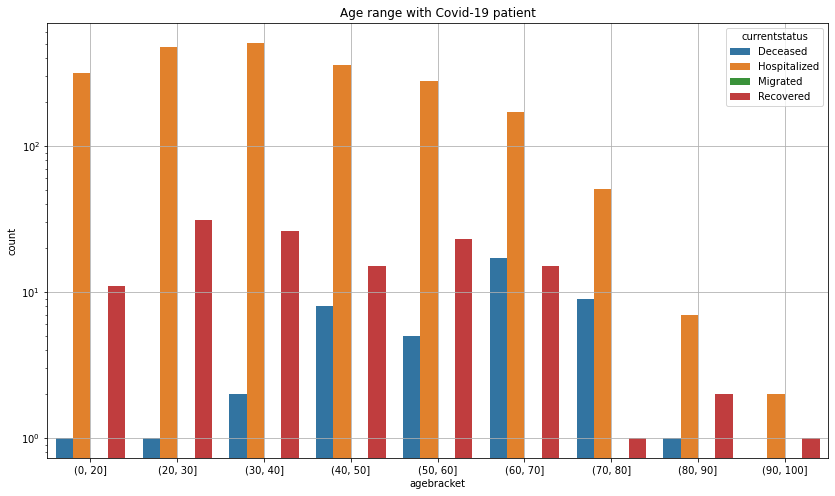

In [30]:
countplot(df_raw_data["agebracket"],df_raw_data["currentstatus"],"Age range with Covid-19 patient")

# **COVID-19 - Age Range distribution across Nationality**

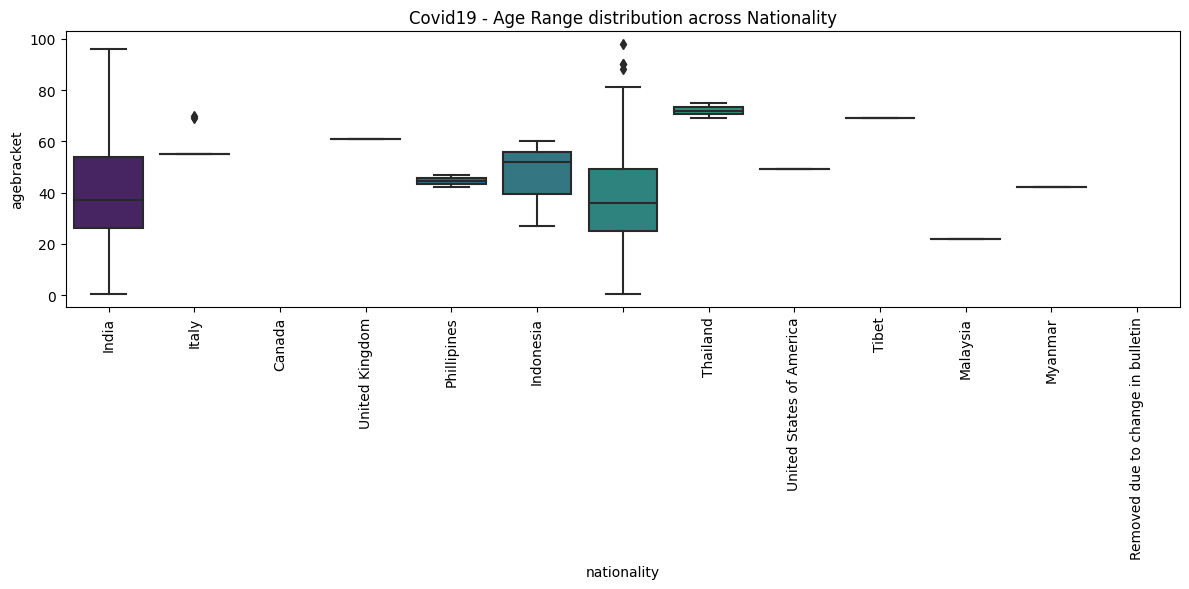

In [31]:
boxplot(df_raw_data,"nationality","agebracket","Covid19 - Age Range distribution across Nationality")

# **Covid-19 cases distribution based on Nationality**

In [32]:
nationality = df_raw_data.groupby('nationality').count()
pieChart(nationality, 'currentstatus', 'Covid19 cases based on Nationality in India')

# **No. of foreign citizens affected by Covid-19 in India**

In [33]:
temp = df_raw_data.groupby('nationality')['patientnumber'].count().reset_index()
temp = temp.sort_values('patientnumber')
temp = temp[temp['nationality']!='']
temp = temp[temp['nationality']!='India']

barChart(temp , 'patientnumber' , 'nationality' , 'No. of foreign citizens' ,'h' )

# **Covid-19 distribution based on Type of Transmission**

In [34]:
temp = pd.DataFrame(df_raw_data[['typeoftransmission']].groupby('typeoftransmission')['typeoftransmission'].count())
temp = temp.dropna()
temp.columns = ['count']
temp = temp.reset_index().sort_values(by='count')

barChart(temp , 'count' , 'typeoftransmission' , 'Type of transmission','h' )

# **Covid-19 cases Vs Age Brackets along with current status**

In [35]:
fig = plotly.subplots.make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Cases vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)

temp = df_raw_data[['agebracket', 'currentstatus']].dropna()
print('Total no. of values :', df_raw_data.shape[0], '\nNo. of missing values :', df_raw_data.shape[0]-temp.shape[0], '\nNo. of available values :', df_raw_data.shape[0]-(df_raw_data.shape[0]-temp.shape[0]))
gen_grp = temp.groupby('currentstatus').count()

fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Deceased', 'Hospitalized', 'Recovered'], 
                     marker_colors = ['#fd0054', '#393e46', '#40a798'], hole=.3),1, 2)

fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Deceased']['agebracket'], nbinsx=50, name='Deceased', marker_color='#fd0054'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Recovered']['agebracket'], nbinsx=50, name='Recovered', marker_color='#40a798'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Hospitalized']['agebracket'], nbinsx=50, name='Hospitalized', marker_color='#393e46'), 1, 1)

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[0].textinfo = 'label+text+value+percent'

fig.show()

Total no. of values : 28183 
No. of missing values : 25841 
No. of available values : 2342


# **Covid-19 cases Gender Vs Age Brackets along with gender distribution**

In [36]:
fig = plotly.subplots.make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Gender vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)

temp = df_raw_data[['agebracket', 'gender']].dropna()
print('Total no. of values :', df_raw_data.shape[0], '\nNo. of missing values :', df_raw_data.shape[0]-temp.shape[0], '\nNo. of available values :', df_raw_data.shape[0]-(df_raw_data.shape[0]-temp.shape[0]))
gen_grp = temp.groupby('gender').count()

fig.add_trace(go.Histogram(x=temp[temp['gender']=='F']['agebracket'], nbinsx=50, name='Female', marker_color='#6a0572'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['gender']=='M']['agebracket'], nbinsx=50, name='Male', marker_color='#39065a'), 1, 1)

fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Female', 'Male'], marker_colors = ['#6a0572', '#39065a']),1, 2)

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[2].textinfo = 'label+text+value+percent'

fig.show()

Total no. of values : 28183 
No. of missing values : 25841 
No. of available values : 2342




# **Covid-19 cases Age distribution of confirmed patients**

In [37]:
print('Total no. of values :', df_raw_data.shape[0], '\nNo. of missing values :', df_raw_data.shape[0]-df_raw_data[['agebracket']].dropna().shape[0],
      '\nNo. of available values :', df_raw_data.shape[0]-(df_raw_data.shape[0]-df_raw_data[['agebracket']].dropna().shape[0]))

histogramChart(df_raw_data,'agebracket','Distribution of ages of confirmed patients')

Total no. of values : 28183 
No. of missing values : 25841 
No. of available values : 2342


# **Age Distribution of Detected Cases acros States and UT**

<Figure size 1200x600 with 0 Axes>

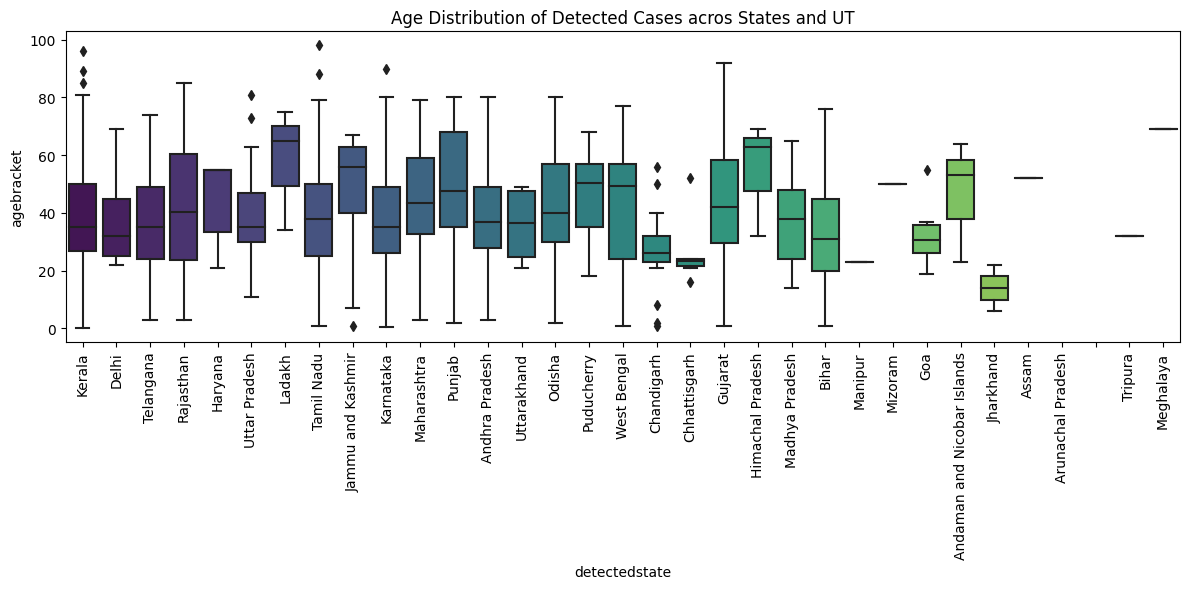

In [38]:
plt.figure(figsize=(12, 6), dpi = 100)
boxplot(df_raw_data,'detectedstate' , 'agebracket' ,'Age Distribution of Detected Cases acros States and UT')

# **Age Distribution across different Nationality**

<Figure size 1200x600 with 0 Axes>

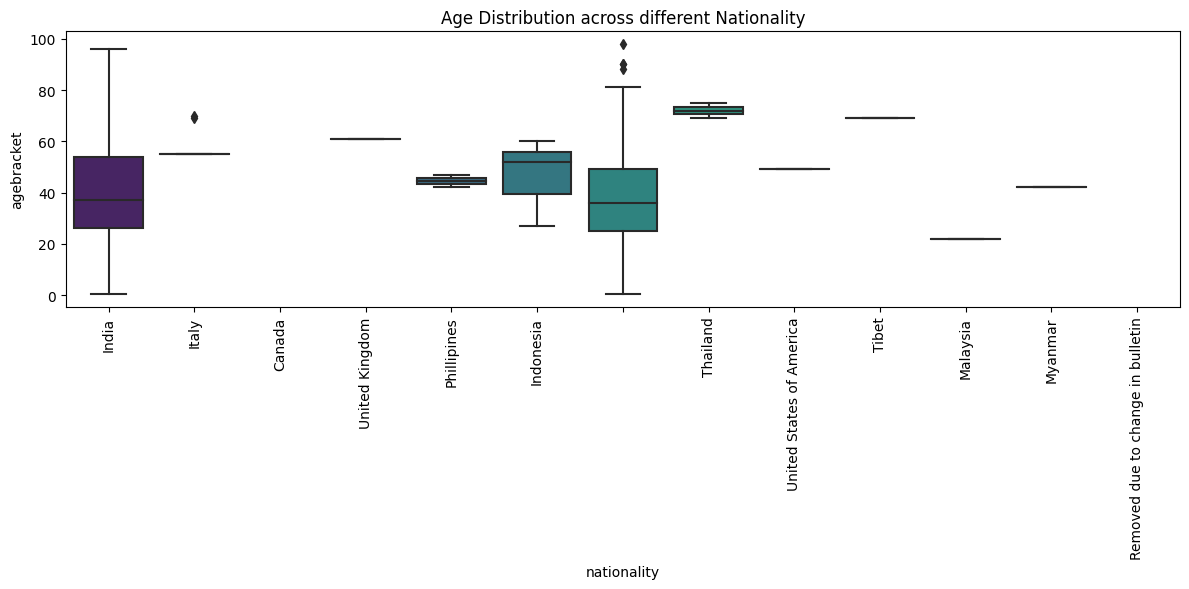

In [39]:
plt.figure(figsize=(12, 6), dpi = 100)
boxplot(df_raw_data , 'nationality' , 'agebracket' , "Age Distribution across different Nationality")

# **Age Distribution of COVID-19 Recovered Patients**

In [40]:
dist = df_raw_data.groupby(['agebracket','currentstatus'])['patientnumber'].count().reset_index()
dist = dist[dist['currentstatus']=='Recovered']
dist
fig = px.bar(dist, x='agebracket', y='patientnumber', orientation='v', text='patientnumber', width=1200,
       color_discrete_sequence = ['#00CC96'], title='Age distribution of Recovered COVID Patient')

fig.update_xaxes(title='Age')
fig.update_yaxes(title='# Patient')
fig.show()


# **Gender Distribution of COVID-19 Recovered Patients**

In [41]:
dist = df_raw_data.groupby(['gender','currentstatus'])['patientnumber'].count().reset_index()
dist = dist[dist['currentstatus']=='Recovered']
dist
fig = px.pie(dist, values=dist['patientnumber'], names=dist.gender
         ,color_discrete_sequence=["#636EFA"],title='Gender distribution of COVID19 Recovered Patients')
fig.update_traces(textposition='outside', textinfo='value+label')
fig.show()

In [44]:
detected_city = df_raw_data['detectedcity'].value_counts().reset_index()
detected_city.rename(columns={"index":"cities",
                            "detectedcity": "Counts"}, inplace=True)

detected_city.cities.replace('', np.nan, inplace=True)
detected_city.dropna(subset=['cities'], how='all', inplace=True)
detected_city.head()

#barChart(detected_city, 'cities', 'Counts', 'Hotspot Cities Detected With Most cases', 'v')

fig = px.bar(detected_city.sort_values('Counts', ascending=True).sort_values('Counts', ascending=False).head(15), 
             y="Counts", x="cities", color= "cities",
             title='Hotspot Cities Detected With Most cases', 
             orientation='v',
             color_discrete_sequence = px.colors.cyclical.IceFire,
             width=700, height=600)
fig.update_traces(opacity=0.8)
fig.update_xaxes(title='Cities')
fig.update_yaxes(title='Counts')
fig.update_layout(template = 'plotly_white')
fig.show()

# **1.4 Visualising the spread geographically**

In [45]:
# Learn how to use folium to create a zoomable map
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

# **1.5 Confirmed vs Recovered figures**

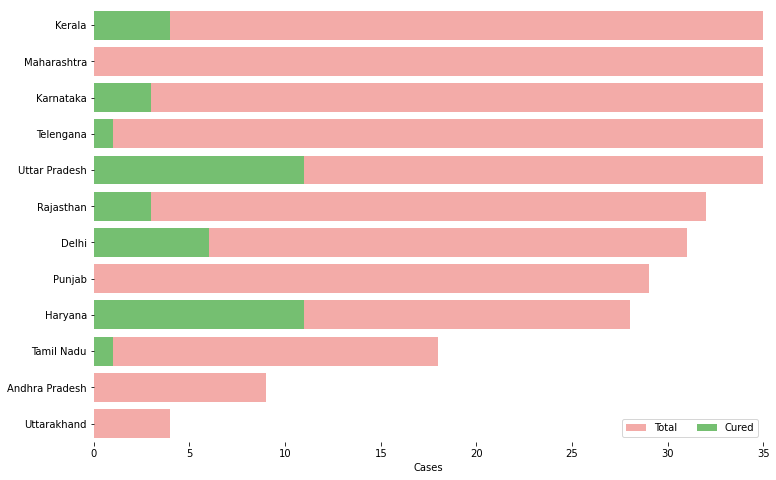

In [46]:
#Learn how to use Seaborn for visualization
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

# 1.6 How the Coronavirus cases are rising?

In [0]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [48]:
#Learn how to create interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

# **Comparison between the rise of cases in Wuhan, S.Korea, Italy and India**

In [49]:

from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

# fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                     marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# **Why is India testing so little?**

[CNN Report](hhttps://www.bbc.com/news/amp/world-asia-india-51922204)
###**Why is a densely populated country with more than a billion people testing so little?** 

The official assumption is the disease has still not spread in the community. As early "evidence" health authorities say 826 samples collected from patients suffering from acute respiratory disease from 50 government hospitals across India between 1 and 15 March tested negative for coronavirus. Also, hospitals have not yet reported a spike in admissions of respiratory distress cases.

"It is reassuring that at the moment there is no evidence of community outbreak," says Balram Bhargava, director of the Indian Council of Medical Research (ICMR). He believes Mr Ghebreyesus's advice is "premature" for India, and it would only "create more fear, more paranoia and more hype".

**But experts are not so sure.**

Many of them believe India is also testing below scale because it fears that its under-resourced and uneven public health system could be swamped by patients. India could be buying time to stock up on testing kits and add isolation and hospital beds. "I know mass testing is not a solution, but our testing appears to be too limited. We need to quickly expand to restrict community transmission," K Sujatha Rao, former federal health secretary and author of But Do We Care: India's Health System.

**India** has eight doctors per 10,000 people compared to 41 in **Italy** and 71 in **Korea**. It has one state-run hospital for more than 55,000 people. (Private hospitals are out of reach for most people). India has a poor culture of testing, and most people with flu symptoms do not go to doctors and instead try home remedies or go to pharmacies. There's a scarcity of isolation beds, trained nursing staff and medics, and ventilators and intensive care beds.
###India poor testing rate masked coronavirus cases: [Report](https://www.aljazeera.com/news/2020/03/india-poor-testing-rate-masked-coronavirus-cases-200318040314568.html)


In [0]:
lab= pd.read_csv('ICMRTestingLabs.csv')

In [51]:
lab.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [52]:
lab.tail()

,lab,address,pincode,city,state,type
262,"Tata Medical Center, Kolkata","Department of Laboratory Sciences, Tata Medica...",700160,Kolkata,West Bengal,Private Laboratory
263,"Laboratory Services, Peerless Hospitex Hospita...","Laboratory Services, Peerless Hospitex Hospita...",700094,Kolkata,West Bengal,Private Laboratory
264,"AMRI Hospitals, Department of Laboratory Medic...","AMRI Hospitals, Department of Laboratory Medic...",700098,Kolkata,West Bengal,Private Laboratory
265,"Suraksha Diagnostics Pvt. Ltd., Kolkata","Suraksha Diagnostics Pvt. Ltd., 12/1, Premises...",700156,Kolkata,West Bengal,Private Laboratory
266,"Dr. Lal PathLabs Ltd, Reference Laboratory, Ko...","Dr. Lal PathLabs Ltd, Reference Laboratory, Pl...",700156,Kolkata,West Bengal,Private Laboratory


In [0]:
states= pd.read_csv('StatewiseTestingDetails.csv')

In [54]:
states.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [55]:
states.tail()

,Date,State,TotalSamples,Negative,Positive
1500,2020-05-24,West Bengal,138824.0,NaN,3667.0
1501,2020-05-25,West Bengal,148049.0,NaN,3816.0
1502,2020-05-26,West Bengal,157277.0,NaN,4009.0
1503,2020-05-27,West Bengal,166513.0,NaN,4192.0
1504,2020-05-28,West Bengal,175769.0,NaN,4536.0


In [56]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1505 non-null   object 
 1   State         1505 non-null   object 
 2   TotalSamples  1505 non-null   float64
 3   Negative      1201 non-null   float64
 4   Positive      1497 non-null   float64
dtypes: float64(3), object(2)
memory usage: 58.9+ KB


In [57]:
states.columns

Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')

In [58]:
Total_confirmed = df_india['Total Confirmed cases (Indian National)'].sum()
Total_recovered =  df_india['Cured'].sum()
Total_death = df_india['Death'].sum()
data12 = [['Total Confirmed cases (Indian National)', Total_confirmed], ['Cured', Total_recovered], ['Death', Total_death]] 
df123 = pd.DataFrame(data12, columns = ['State / UT', 'count']) 
fig = px.pie(df123,
             values= 'count',labels=['Total Confirmed cases (Indian National)','Cured','Death'],
             names="State / UT",
             title="Real Time data from www.covid19india.org",
             template="seaborn")
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=14,
                  marker=dict(colors=['#263fa3', '#2fcc41','#cc3c2f'], line=dict(color='#FFFFFF', width=2)))
fig.update_traces(textposition='inside')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [0]:
df = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])


In [0]:
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)


In [0]:

df_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [62]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [64]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0.0,0.0,0.0
1,2020-01-22,Australia,From Diamond Princess,0.0,0.0,0.0
2,2020-01-22,Australia,New South Wales,0.0,0.0,0.0
3,2020-01-22,Australia,Northern Territory,0.0,0.0,0.0
4,2020-01-22,Australia,Queensland,0.0,0.0,0.0


In [65]:
# Check for India's data
df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,194.0,4.0,15.0
58,2020-03-20,244.0,5.0,20.0
59,2020-03-21,330.0,4.0,23.0
60,2020-03-22,396.0,7.0,27.0


In [66]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


# **3.1 Visualizing: Worldwide NCOVID-19 cases**

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [68]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

# **Forecasting Total Number of Cases**

Prophet
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Why Prophet?
Accurate and fast: Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in Stan so that you get forecasts in just a few seconds.

Fully automatic: Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

Tunable forecasts: The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

Available in R or Python: Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts.

References
https://facebook.github.io/prophet/
https://facebook.github.io/prophet/docs/
https://github.com/facebook/prophet
https://facebook.github.io/prophet/docs/quick_start.html

In [0]:
from fbprophet import Prophet

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [0]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [72]:
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0


In [73]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.**bold text**

In [74]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872975,335531.446669,376289.849715
65,2020-03-27,372235.326938,352336.204414,392045.053091
66,2020-03-28,388674.964143,366749.343307,410215.482754
67,2020-03-29,405307.954675,383477.412479,426974.180026
68,2020-03-30,418529.648466,393967.651218,440177.929779


**You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.**

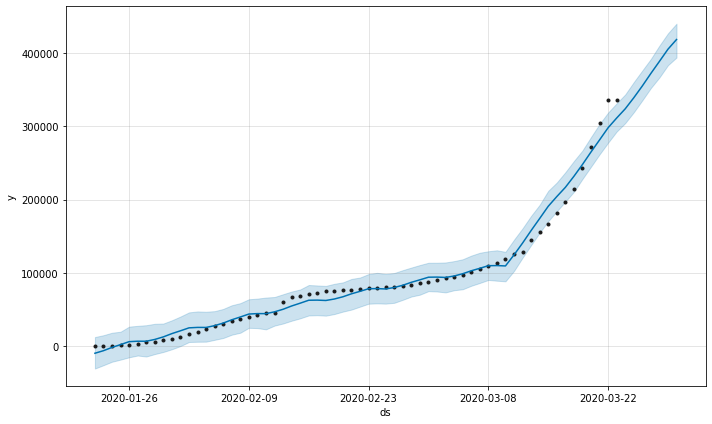

In [75]:
confirmed_forecast_plot = m.plot(forecast)

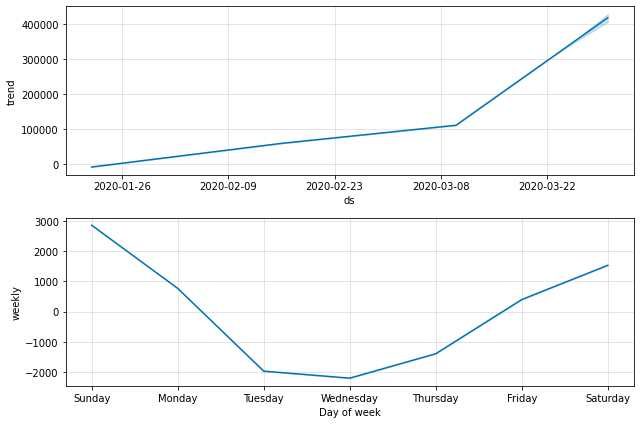

In [76]:
confirmed_forecast_plot =m.plot_components(forecast)

# **4.2 Forecasting Worldwide Deaths using Prophet (Base model)**

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.


In [0]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [78]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [79]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.877522,14468.343187,16331.757048
65,2020-03-27,16199.617603,15173.073683,17134.642778
66,2020-03-28,17006.904589,16010.080523,18006.658848
67,2020-03-29,17831.505383,16761.341598,18842.661644
68,2020-03-30,18490.986176,17388.883232,19613.972124


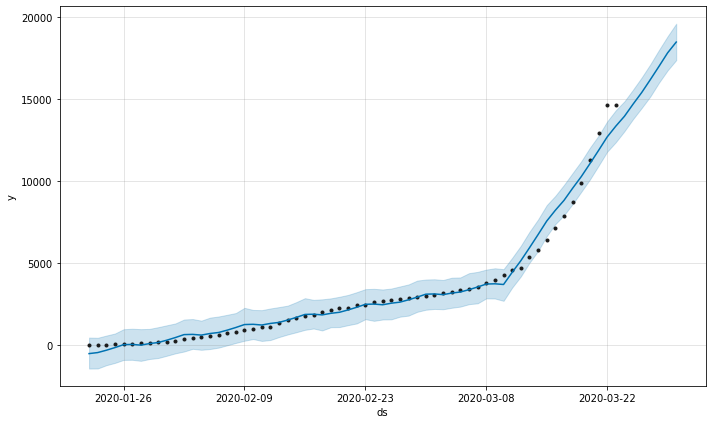

In [80]:
deaths_forecast_plot = m.plot(forecast)

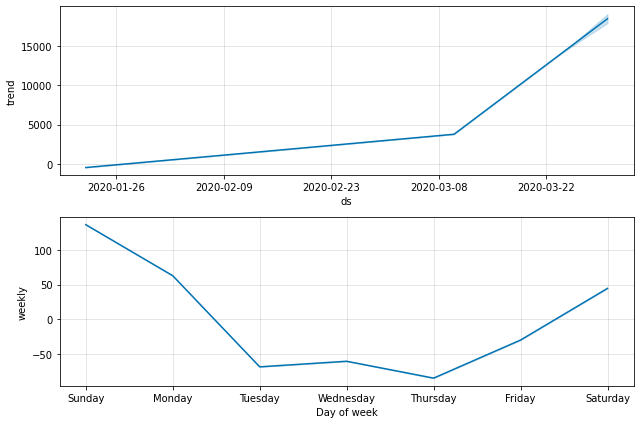

In [81]:
deaths_forecast_plot = m.plot_components(forecast)

# **4.3 Forecasting Worldwide Recovered Cases with Prophet (Base model)**

In [0]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [83]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [84]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103001.351662,101174.072390,104850.165604
65,2020-03-27,105338.025042,103499.955536,107281.520668
66,2020-03-28,108256.310813,106193.258925,110032.608719
67,2020-03-29,111119.296170,108833.584838,113520.740693
68,2020-03-30,113244.961749,110597.702739,115703.915186


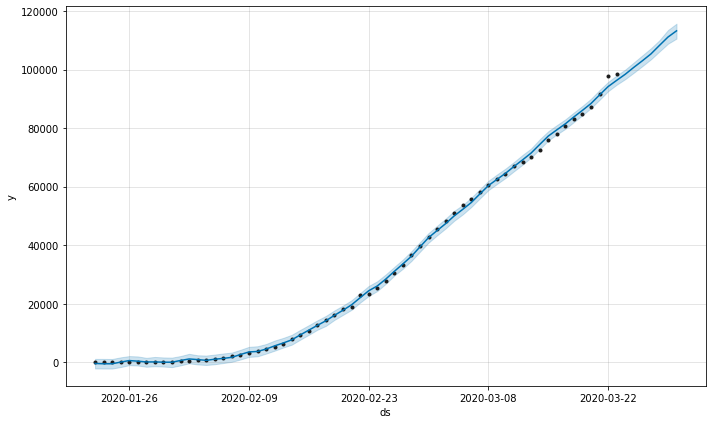

In [85]:
recovered_forecast_plot = m.plot(forecast)

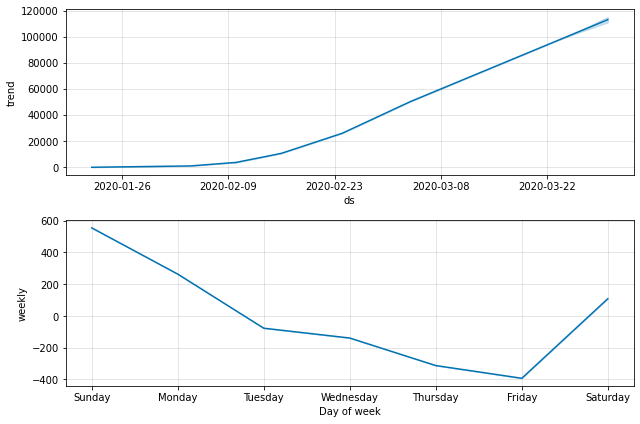

In [86]:
recovered_forecast_plot = m.plot_components(forecast)


Don't take your cough and cold lighly as before. If you look at the data number of cases in India is rising but not like in Italy, Wuhan, S.Korea, Spain, or USA. Don't get fool by these numbers (COVID cases in India). I think the number is less because of low awareness and less tests being conducted in India. Currently India is a deadly and risky zone as there are very few COVID-19 test centres in India. Imagine how many infected people are still around you and are infecting others unknowingly. Remember India ranks 145 in terms of global healthcare rank while Italy is on 2nd.


Indian government's decision for today confirms that the above prediction is definitely something we pay attention to.
Please stay home/indoors for all 21 days. This will definitely help us tackle the situation. It won't stop the pandemic, but it would definitely help us reduce the exponential rate at which it is increasing.
Let's give a hand in fighting this pandemic atleast by quarantining ourselves by staying indoors and protecting you and your family.
Go and get a checkup done in case you are suffering from cough,cold, fever, shortness of breath and breathing difficulties. Can't tell for sure but(due to lack of data) , but it might be possible that we don't have the exact number of the COVID-19 cases in India becasuse sometimes it takes weeks to see the first sign/symptom for it.
If you're not getting the checkup done, you might add in spreading the virus unintentionally
Its time we take this pandemic seriously - LIVE & HELP OTHERS LIVE
Take precautions, stay indoors, and utilize this time to develop your machine learning skill with edureka's AI-ML PGP and help the world with your machine learning models.



Nature is sending us a message with the coronavirus pandemic and the ongoing climate crisis, according to the UN’s environment chief, Inger Andersen.
Think on a positive side, this lockdown will help the environment to heal better, reduce different kinds of pollution, and improve air quality


# **COVID-19 Symptoms**

COVID-19 affects different people in different ways. Most infected people will develop mild to moderate illness and recover without hospitalization.
Most common symptoms:
fever
dry cough
tiredness
Less common symptoms:
aches and pains
sore throat
diarrhoea
conjunctivitis
headache
loss of taste or smell
a rash on skin, or discolouration of fingers or toes
Serious symptoms:
difficulty breathing or shortness of breath
chest pain or pressure
loss of speech or movement
Seek immediate medical attention if you have serious symptoms. Always call before visiting your doctor or health facility.
People with mild symptoms who are otherwise healthy should manage their symptoms at home.
On average it takes 5–6 days from when someone is infected with the virus for symptoms to show, however it can take up to 14 days.
[link text](![alt text](![alt text](https://))https://www.who.int/emergencies/diseases/novel-coronavirus-2019/question-and-answers-hub/q-a-detail/q-a-coronaviruses#:~:text=symptoms)



# CURRENT SITUATION 

### Indian streets today!
![alt text](https://i.imgur.com/jIE1kro.jpg)

- Nature is sending us a message with the coronavirus pandemic and the ongoing climate crisis, according to the UN’s environment chief, Inger Andersen.
- Think on a positive side, this lockdown will help the environment to heal better, reduce different kinds of pollution, and improve air quality
